In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blank with 0 as tenure is 0 and no total chargers are available

In [5]:
df['TotalCharges'] = df["TotalCharges"].replace(" ","0")

In [6]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
def conv(value):
    if value == 0:
        return "No"
    else:
        return "Yes"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

df.head()
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [16]:
df["TotalCharges"].dtype

dtype('float64')

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


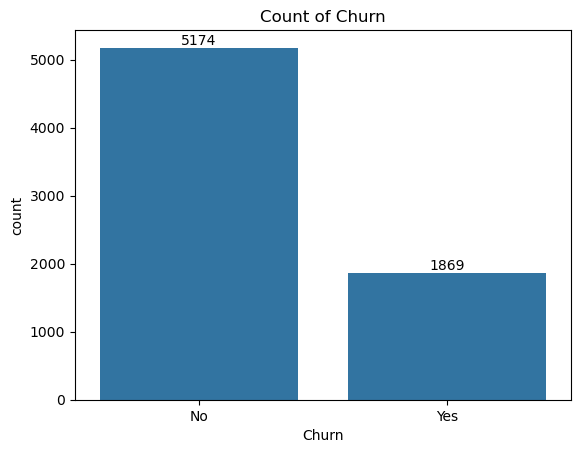

In [19]:
# Create the count plot
ax=sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churn")
plt.show()

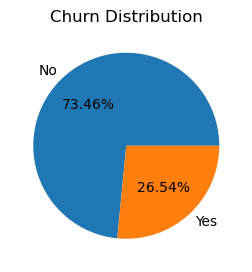

In [20]:
plt.figure(figsize=(3,5))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct="%1.2f%%")
plt.title("Churn Distribution")
plt.show()

#From the given pie chart we concluded that 26.54% of the customer are churned and 73.46% of customer are not churned

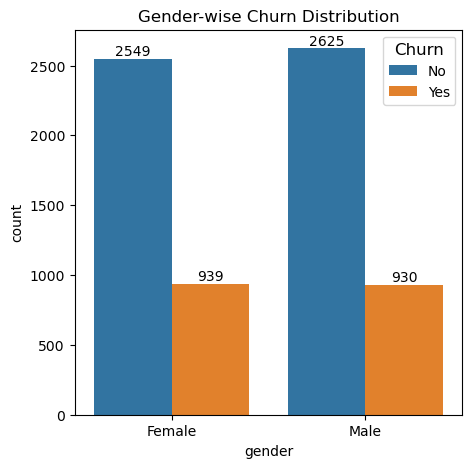

In [21]:
plt.figure(figsize=(5,5))
# Create the countplot
ax1 = sns.countplot(x='gender', data=df, hue='Churn')

# Add labels (counts) on top of the bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')  # Display integer counts

# Show the plot
plt.legend(title='Churn', loc='upper right', fontsize=10, title_fontsize=12)
plt.title("Gender-wise Churn Distribution")
plt.show()

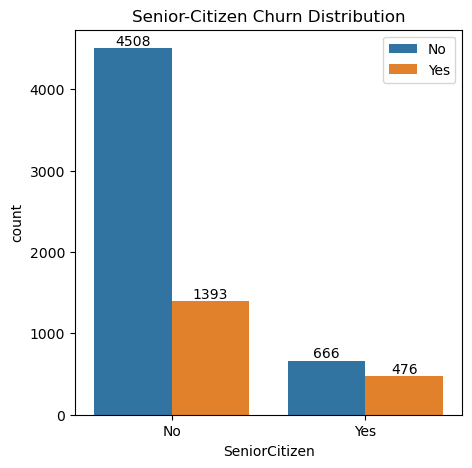

In [22]:
plt.figure(figsize=(5,5))
# Create the countplot
ax2 = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

# Add labels (counts) on top of the bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')  # Display integer counts

# Show the plot
plt.title("Senior-Citizen Churn Distribution")
plt.legend(loc='upper right', fontsize=10, title_fontsize=12)

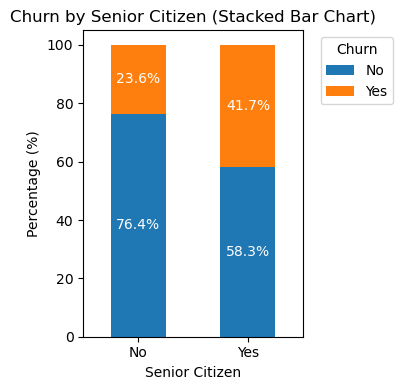

In [23]:
import matplotlib.pyplot as plt

# Grouping and calculating percentages
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))  # Increased size for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if needed

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    # Ensure height > 0 for placing the label
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
                ha='center', va='center', fontsize=10, color='white')

# Customize the plot
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Adjust legend position
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<!--  --> comparatively greater number of senior citizen customer have churned out 

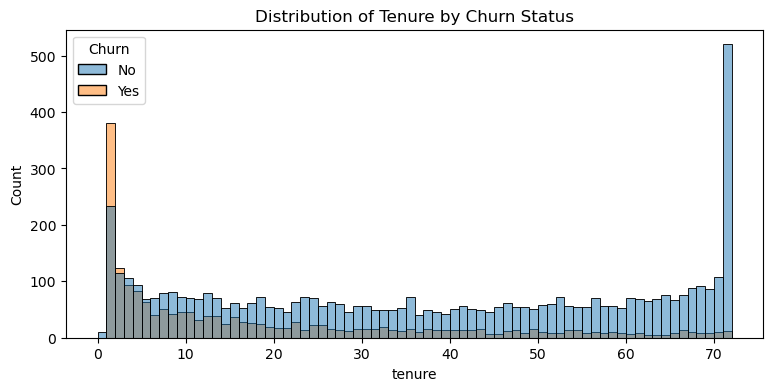

In [24]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue = "Churn")
plt.title("Distribution of Tenure by Churn Status")
plt.show()


<!--  -->People who have used our services for a long time havent churned, but people who used our services only for 1 to 2 months have curned out

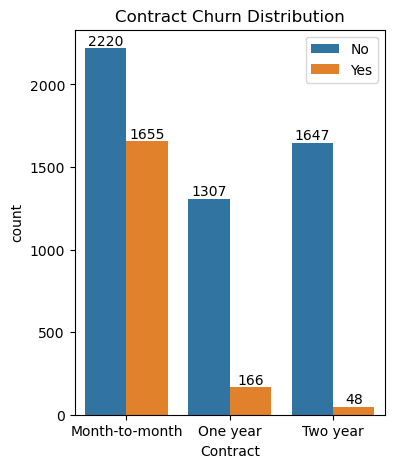

In [25]:
plt.figure(figsize=(4,5))
# Create the countplot
ax2 = sns.countplot(x='Contract', data=df, hue='Churn')

# Add labels (counts) on top of the bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')  # Display integer counts

# Show the plot
plt.title("Contract Churn Distribution")
plt.legend(loc='upper right', fontsize=10, title_fontsize=12)

<!--  -->Analysis reveals that customers with month-to-month plans have a higher churn rate compared to those with 1- or 2-year contracts.

In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

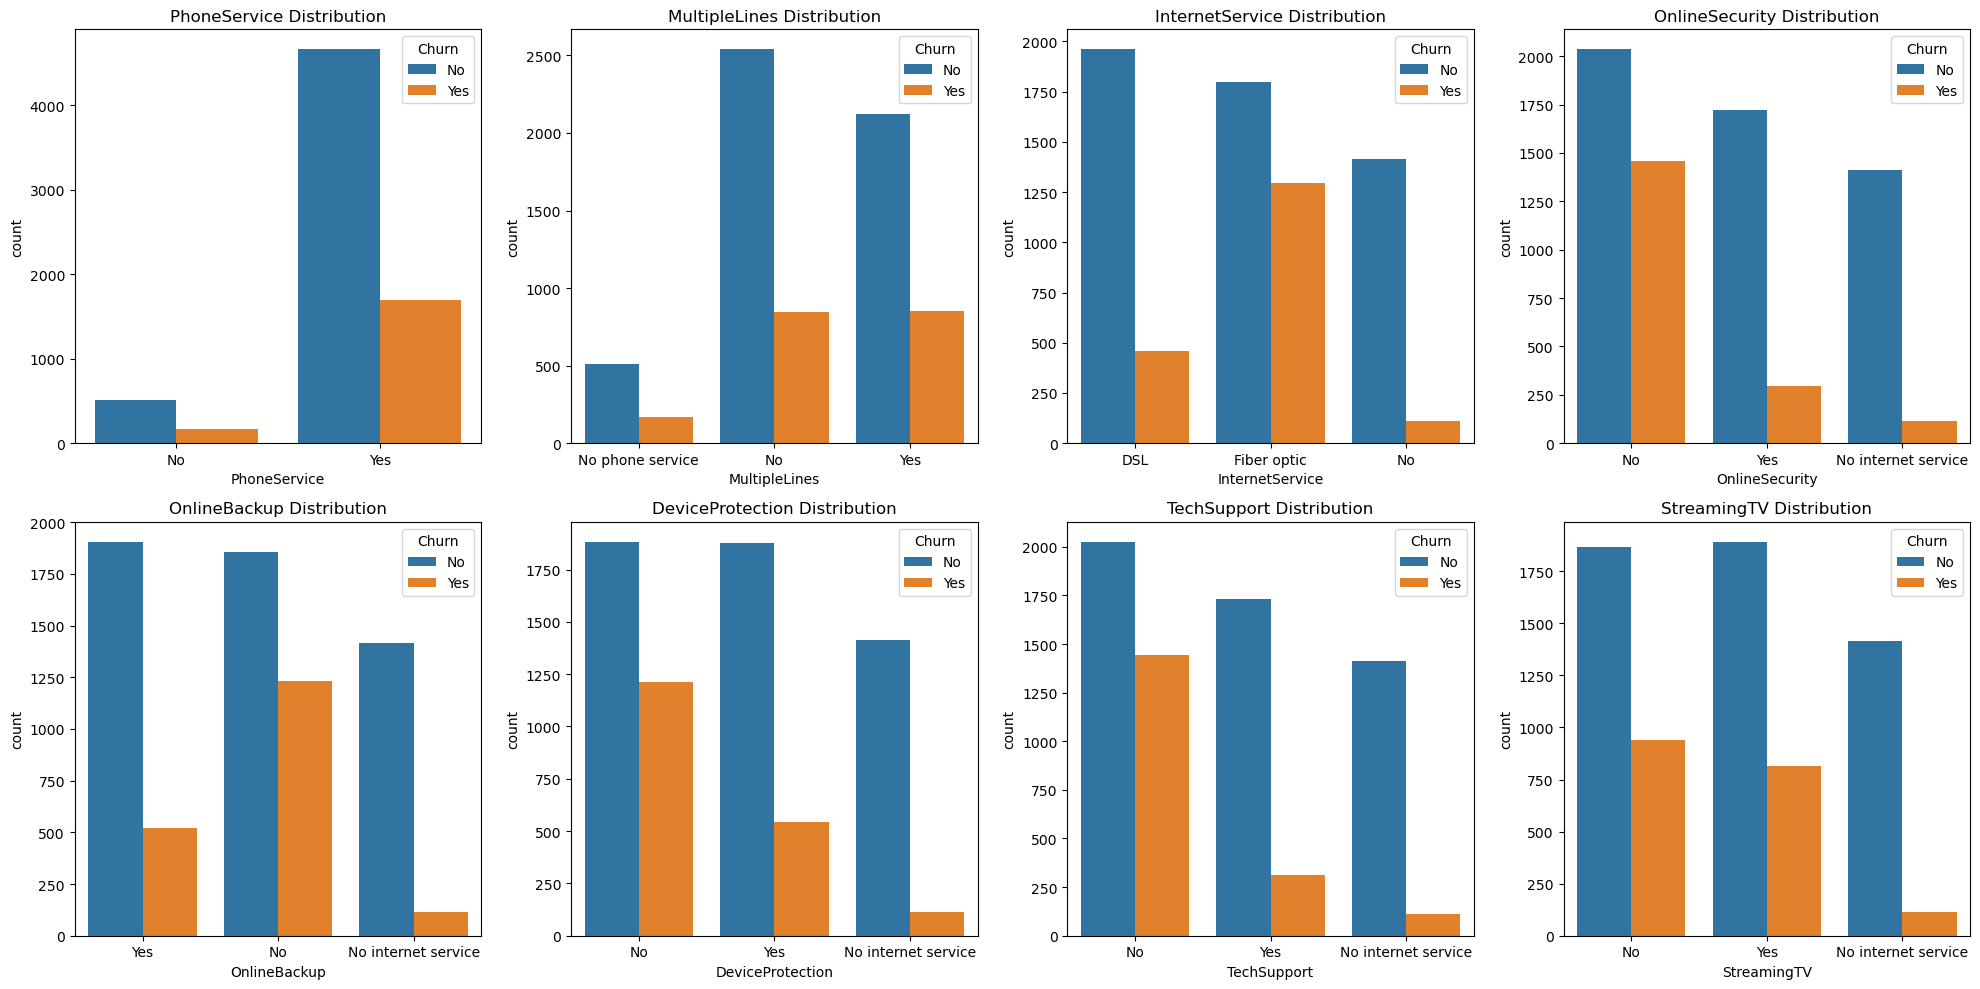

In [35]:
# Create countplots for each column
service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV']

plt.figure(figsize=(20, 10))
for i, col in enumerate(service_columns, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.countplot(x=col, data=df,hue="Churn")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

<!--  -->Customers using "fiber optic" internet show significantly higher churn rates compared to DSL or no internet service. Lack of additional services like online security, tech support, device protection, and backups is strongly associated with increased churn. In contrast, customers with no optional services or internet tend to churn less, emphasizing the importance of service quality and feature satisfaction in retaining customers

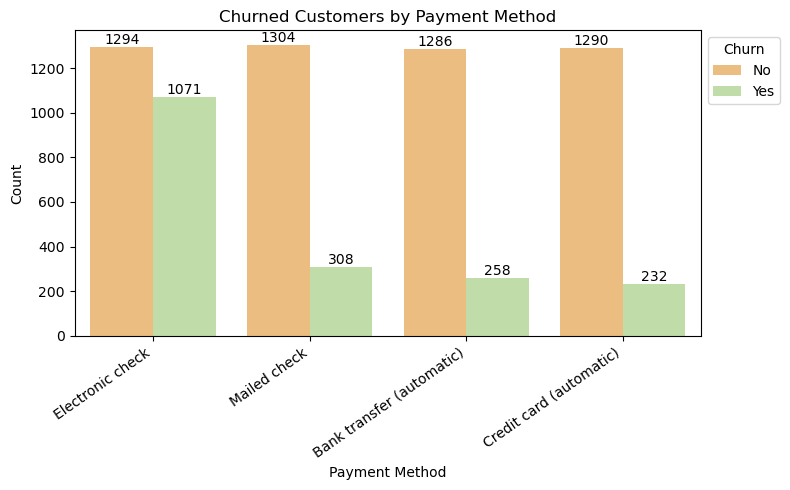

In [61]:
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue for 'No' and Orange for 'Yes'

plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn",palette= "Spectral")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# # Rotate x-axis labels for better readability
plt.xticks(rotation=35, ha='right')

# Adjust legend position outside the plot
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))

# Add title and display the plot
plt.title("Churned Customers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<!--  --> "Electronic Check" and "Mailed Check" have significantly higher churn rates compared to "Bank Transfer (automatic)" and "Credit Card (automatic)."

In [64]:
# Encode categorical columns with one-hot encoding
data_encoded = pd.get_dummies(df, drop_first=True)

# Check the dataset after encoding
data_encoded.head()


,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [66]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Standardize numeric columns
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])


In [67]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('Churn_Yes', axis=1)  # Adjust target column name as per encoding
y = data_encoded['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


[[934 102]
 [149 224]]
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Accuracy: 0.82


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Example: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1036
        True       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

